In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_metrics_site(x_pred, y_pred, f_pred, x_true, y_true, f_true, site_arr):
    '''
    site_arrは、intじゃなくて、"B1", "F2"みたいな感じで入力
    site_arr = le_site.inverse_transform(df_train.site_id)
    '''
    site_arr = np.asarray(site_arr)
    site_unique = sorted(np.unique(site_arr))
    score_list = []
    n_sample = []
    for site in site_unique:
        logics = site_arr == site
        x_pred_, y_pred_, f_pred_ = x_pred[logics], y_pred[logics], f_pred[logics]
        x_true_, y_true_, f_true_, = x_true[logics], y_true[logics], f_true[logics]
        len_x = len(x_pred_)
        
        intermediate = np.sqrt(np.power(x_pred_-x_true_, 2) + np.power(y_pred_-y_true_, 2)) + 15 * np.abs(f_pred_-f_true_)
        
        score_list.append(intermediate.sum()/len_x)
        n_sample.append(len_x)
    
    df_result = pd.DataFrame({
        'site': site_unique,
        'n_sample': n_sample,
        'score': score_list,
    })
    return df_result

import pytablewriter
def site_eval_report(df_result_site):
    df_result_site.insert(loc=0, column='No', value=df_result_site.index)
    writer = pytablewriter.MarkdownTableWriter()
    writer.from_dataframe(df_result_site)
    writer.write_table()

In [3]:
oof = pd.read_csv('../exp/exp007/oof.csv')
x_pred = oof["oof_x"]
y_pred = oof["oof_y"]
f_pred = oof["floor"]
x_true = oof["wifi_x"]
y_true = oof["wifi_y"]
f_true = oof["floor"]
site_arr = oof["site_id_str"]

In [4]:
df_result_site = calc_metrics_site(x_pred, y_pred, f_pred, x_true, y_true, f_true, site_arr)
df_result_site.style.bar(subset=['n_sample', 'score'], color=['teal'])

,site,n_sample,score
0,5a0546857ecc773753327266,9296,5.155268
1,5c3c44b80379370013e0fd2b,9737,8.013753
2,5d27075f03f801723c2e360f,23666,7.111779
3,5d27096c03f801723c31e5e0,9100,4.682105
4,5d27097f03f801723c320d97,10507,10.757987
5,5d27099f03f801723c32511d,4251,6.952029
6,5d2709a003f801723c3251bf,3940,5.389814
7,5d2709b303f801723c327472,15358,5.844538
8,5d2709bb03f801723c32852c,17203,9.210884
9,5d2709c303f801723c3299ee,10083,6.367946


In [5]:
site_eval_report(df_result_site)

|No |          site          |n_sample|score |
|--:|------------------------|-------:|-----:|
|  0|5a0546857ecc773753327266|    9296| 5.155|
|  1|5c3c44b80379370013e0fd2b|    9737| 8.014|
|  2|5d27075f03f801723c2e360f|   23666| 7.112|
|  3|5d27096c03f801723c31e5e0|    9100| 4.682|
|  4|5d27097f03f801723c320d97|   10507|10.758|
|  5|5d27099f03f801723c32511d|    4251| 6.952|
|  6|5d2709a003f801723c3251bf|    3940| 5.390|
|  7|5d2709b303f801723c327472|   15358| 5.845|
|  8|5d2709bb03f801723c32852c|   17203| 9.211|
|  9|5d2709c303f801723c3299ee|   10083| 6.368|
| 10|5d2709d403f801723c32bd39|   10027| 7.982|
| 11|5d2709e003f801723c32d896|   11042| 8.933|
| 12|5da138274db8ce0c98bbd3d2|    2662| 7.047|
| 13|5da1382d4db8ce0c98bbe92e|    8999| 7.467|
| 14|5da138314db8ce0c98bbf3a0|    9012| 4.484|
| 15|5da138364db8ce0c98bc00f1|    2767| 4.350|
| 16|5da1383b4db8ce0c98bc11ab|   13196| 9.978|
| 17|5da138754db8ce0c98bca82f|    7188| 7.655|
| 18|5da138764db8ce0c98bcaa46|    9420| 7.069|
| 19|5da1389e

In [51]:
n = 5
count = 0
for path, df in oof.groupby("path"):
    count += 1
    if count == n:
        break

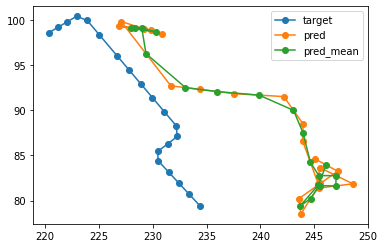

In [52]:
plt.plot(df["wifi_x"], df["wifi_y"], marker="o", label="target")
plt.plot(df["oof_x"], df["oof_y"], marker="o", label="pred")
window= int(len(df) / 10)
plt.plot(df["oof_x"].rolling(window).mean(), df["oof_y"].rolling(window).mean(), marker="o", label="pred_mean")
plt.legend()
# plt.savefig("result2.png")

後処理のものを見てみる